### Importación de datos



In [89]:
# Importamos librerías necesarias:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Cargamos los datos de un csv
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [90]:
#Creamos un diccionario con todas las tiendas para optimización
tiendas={"tienda_1":tienda,"tienda_2":tienda2,"tienda_3":tienda3,"tienda_4":tienda4}

#Calcula el ingreso total, basándose en la columna Precio, de cada tienda.
# Entrada: 
#   - tiendas (dict): diccionario donde cada clave es el nombre de una tienda 
#     y cada valor es un DataFrame con los datos de ventas de esa tienda.
# Salida:
#   - ingresos (dict): diccionario con el ingreso total (suma de la columna "Precio") por tienda.
def ingresos_por_tiendas(tiendas: dict)-> dict:
    ingresos={}
    for nombre_tienda,tienda in tiendas.items():
        ingresos[nombre_tienda]=tienda["Precio"].sum()
    return ingresos

ingresos=ingresos_por_tiendas(tiendas)

#Veamos el ingreso total de cada tienda:
ingreso_total_tienda1=ingresos["tienda_1"]
ingreso_total_tienda2=ingresos["tienda_2"]
ingreso_total_tienda3=ingresos["tienda_3"]
ingreso_total_tienda4=ingresos["tienda_4"]

In [91]:
print(f"Ingreso tienda 1: ${ingreso_total_tienda1:,.2f}")
print(f"Ingreso tienda 2: ${ingreso_total_tienda2:,.2f}")
print(f"Ingreso tienda 3: ${ingreso_total_tienda3:,.2f}")
print(f"Ingreso tienda 4: ${ingreso_total_tienda4:,.2f}")

Ingreso tienda 1: $1,150,880,400.00
Ingreso tienda 2: $1,116,343,500.00
Ingreso tienda 3: $1,098,019,600.00
Ingreso tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [92]:
# Función que cuenta cuántos productos se vendieron de cada categoría en una tienda.
# Entrada:
#   - tienda (pd.DataFrame): DataFrame con los datos de ventas de una tienda.
# Salida:
#   - diccionario (dict): claves = categorías, valores = cantidad de productos vendidos
def cantidad_productos_vendidos_por_categoria(tienda:pd.DataFrame)->dict:
    diccionario=tienda["Categoría del Producto"].value_counts().to_dict()
    return diccionario

In [93]:
cantidad_tienda1=cantidad_productos_vendidos_por_categoria(tiendas["tienda_1"])
cantidad_tienda2=cantidad_productos_vendidos_por_categoria(tiendas["tienda_2"])
cantidad_tienda3=cantidad_productos_vendidos_por_categoria(tiendas["tienda_3"])
cantidad_tienda4=cantidad_productos_vendidos_por_categoria(tiendas["tienda_4"])

print(f""" Cantidad productos vendidos por categorías:
        Tienda 1 - {cantidad_tienda1}
        Tienda 2 -{cantidad_tienda2}
        Tienda 3 -{cantidad_tienda3}
        Tienda 4 - {cantidad_tienda4} """)

mas_vendidos_tienda1 = sorted(cantidad_tienda1.items(), key=lambda x: x[1], reverse=True)[:2]
print("Tienda 1 - Categorías más vendidas:", mas_vendidos_tienda1)

mas_vendidos_tienda2 = sorted(cantidad_tienda2.items(), key=lambda x: x[1], reverse=True)[:2]
print("Tienda 2 - Categorías más vendidas:", mas_vendidos_tienda2)

mas_vendidos_tienda3 = sorted(cantidad_tienda3.items(), key=lambda x: x[1], reverse=True)[:2]
print("Tienda 3 - Categorías más vendidas:", mas_vendidos_tienda3)


mas_vendidos_tienda4 = sorted(cantidad_tienda4.items(), key=lambda x: x[1], reverse=True)[:2]
print("Tienda 4 - Categorías más vendidas:", mas_vendidos_tienda4)



 Cantidad productos vendidos por categorías:
        Tienda 1 - {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}
        Tienda 2 -{'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}
        Tienda 3 -{'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}
        Tienda 4 - {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170} 
Tienda 1 - Categorías más vendidas: [('Muebles', 465), ('Electrónicos', 448)]
Tienda 2 - Categorías más vendidas: [('Muebles', 4

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [94]:
# Función que calcula la calificación promedio de los clientes en cada tienda.
# Entrada:
#   - tiendas (dict): diccionario con DataFrames de cada tienda.
# Salida:
#   - calificacion (dict): calificación promedio por tienda.
def calificacion_promedio(tiendas: dict)-> dict:
    calificacion={}
    for nombre_tienda,tienda in tiendas.items():
        calificacion[nombre_tienda]=tienda["Calificación"].mean()
    return calificacion

calificacion=calificacion_promedio(tiendas)

#Veamos la calificación promedio de cada tienda:
cal_prom_tienda1=calificacion["tienda_1"]
cal_prom_tienda2=calificacion["tienda_2"]
cal_prom_tienda3=calificacion["tienda_3"]
cal_prom_tienda4=calificacion["tienda_4"]

In [95]:
print(f"Calificación promedio tienda 1: {cal_prom_tienda1:,.2f}")
print(f"Calificación promedio tienda 2: {cal_prom_tienda2:,.2f}")
print(f"Calificación promedio tienda 3: {cal_prom_tienda3:,.2f}")
print(f"Calificación promedio tienda 4: {cal_prom_tienda4:,.2f}")

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [96]:
# Función que cuenta cuántas unidades se vendieron de cada producto (por nombre).
# Entrada:
#   - tienda (pd.DataFrame): DataFrame con datos de una tienda.
# Salida:
#   - diccionario (dict): claves = productos, valores = cantidad vendida.
def cantidad_productos_vendidos(tienda:pd.DataFrame)->dict:
    diccionario=tienda["Producto"].value_counts().to_dict()
    return diccionario

In [97]:
cantidad_productos_tienda1=cantidad_productos_vendidos(tiendas["tienda_1"])
cantidad_productos_tienda2=cantidad_productos_vendidos(tiendas["tienda_2"])
cantidad_productos_tienda3=cantidad_productos_vendidos(tiendas["tienda_3"])
cantidad_productos_tienda4=cantidad_productos_vendidos(tiendas["tienda_4"])

print(f""" Cantidad de productos vendidos en cada tienda:
        Tienda 1 - {cantidad_productos_tienda1}
        Tienda 2 - {cantidad_productos_tienda2}
        Tienda 3 - {cantidad_productos_tienda3}
        Tienda 4 - {cantidad_productos_tienda4} """)

# Función auxiliar que devuelve el producto más vendido y el menos vendido.
# Entrada:
#   - diccionario (dict): productos y sus cantidades vendidas.
# Salida:
#   - tupla: (producto más vendido, producto menos vendido)
def mas_y_menos_vendido(diccionario: dict)-> tuple:
    ordenados = sorted(diccionario.items(), key=lambda x: x[1], reverse=True)
    return ordenados[0], ordenados[-1]  # (más vendido, menos vendido)

print("Tienda 1 - Más y menos vendido:", mas_y_menos_vendido(cantidad_productos_tienda1))
print("Tienda 2 - Más y menos vendido:", mas_y_menos_vendido(cantidad_productos_tienda2))
print("Tienda 3 - Más y menos vendido:", mas_y_menos_vendido(cantidad_productos_tienda3))
print("Tienda 4 - Más y menos vendido:", mas_y_menos_vendido(cantidad_productos_tienda4))


 Cantidad de productos vendidos en cada tienda:
        Tienda 1 - {'TV LED UHD 4K': 60, 'Armario': 60, 'Microondas': 60, 'Secadora de ropa': 58, 'Bloques de construcción': 56, 'Mesa de noche': 56, 'Balón de baloncesto': 55, 'Vaso térmico': 54, 'Impresora': 54, 'Bicicleta': 54, 'Refrigerador': 54, 'Batería': 53, 'Cubertería': 52, 'Carrito de control remoto': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Iphone 15': 49, 'Ajedrez de madera': 49, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Guitarra eléctrica': 47, 'Guitarra acústica': 46, 'Sofá reclinable': 46, 'Silla de oficina': 46, 'Estufa': 45, 'Kit de bancas': 44, 'Cama box': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Cama king': 44, 'Smart TV': 44, 'Set de ollas': 43, 'Smartwatch': 43, 'Juego de mesa': 43, 'Dashboards con Power BI': 42, 'Tablet ABXY': 42, 'Balón de voleibol': 42, 'Set de vasos': 41, 'Iniciando en programación': 41, 'Sillón': 41, 'Asistente virtual': 40, 'Dinosaurio Rex': 40, 'Mesa de comedor': 40, 'Cuer

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda

In [98]:
# Función que calcula el costo de envío promedio por tienda.
# Entrada:
#   - tiendas (dict): diccionario con DataFrames de cada tienda.
# Salida:
#   - calificacion (dict): costo promedio de envío por tienda.
def costo_envio_promedio(tiendas: dict)-> dict:
    calificacion={}
    for nombre_tienda,tienda in tiendas.items():
        calificacion[nombre_tienda]=tienda["Costo de envío"].mean()
    return calificacion

costo=costo_envio_promedio(tiendas)

#Veamos el costo de envio promedio de cada tienda:
costo_prom_tienda1=costo["tienda_1"]
costo_prom_tienda2=costo["tienda_2"]
costo_prom_tienda3=costo["tienda_3"]
costo_prom_tienda4=costo["tienda_4"]

In [99]:
print(f"Costo de envio promedio tienda 1: ${costo_prom_tienda1:,.2f}")
print(f"Costo de envio promedio tienda 2: ${costo_prom_tienda2:,.2f}")
print(f"Costo de envio promedio tienda 3: ${costo_prom_tienda3:,.2f}")
print(f"Costo de envio promedio tienda 4: ${costo_prom_tienda4:,.2f}")

Costo de envio promedio tienda 1: $26,018.61
Costo de envio promedio tienda 2: $25,216.24
Costo de envio promedio tienda 3: $24,805.68
Costo de envio promedio tienda 4: $23,459.46


6. GRÁFICOS

Para visualizar los ingresos por tiendas, al ser una variable cuantitativa discreta un gráfico de barras verticales nos permitirá visualizar la tendencia

Para visualizar las ventas por categoría, usaremos un pie chart ya que el nombre de la categoría es una variable cualitativa y la frecuencia(cantidad) es cuantitativa discreta.

Para visualizar la calificación promedio de la tienda, usaremos un gráfico de barras (variable cuantitativa continua)

Para visualizar los productos más y menos vendidos, usaremos un gráfico de barras horizontal al tratarse de una variable categórica y una cuantitativa discreta (cantidad vendida)

Para visualizar el costo promedio de  envio , al ser una variable cuantitativa continua, usaremos un grafico de barras verticales

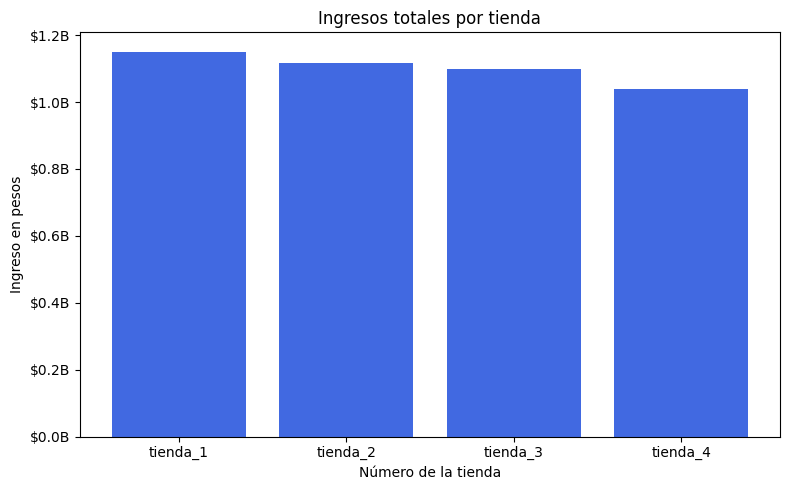

In [100]:
# Gráfico 1: Ingresos por tienda (barras)
plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values(), color='royalblue')
plt.title("Ingresos totales por tienda")
plt.xlabel("Número de la tienda")
plt.ylabel("Ingreso en pesos")

# Formato del eje Y en billones (1B = 1,000,000,000)
formatter = mtick.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

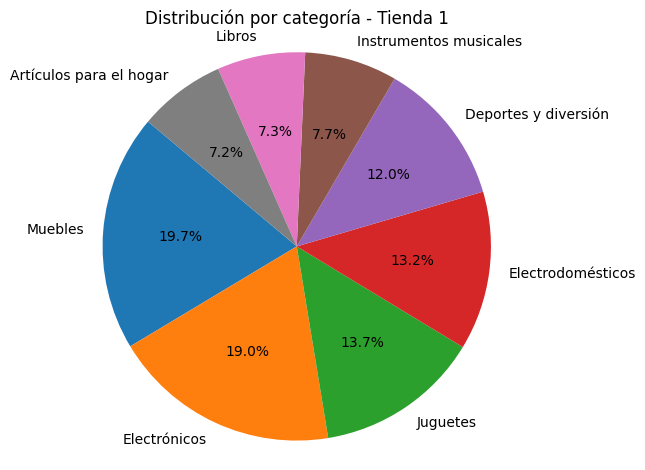

In [101]:
# Gráfico 2.1: Pie chart - categorías de productos en tienda 1
plt.pie(
    cantidad_tienda1.values(),
    labels=cantidad_tienda1.keys(),
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribución por categoría - Tienda 1")
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.tight_layout()
plt.show()


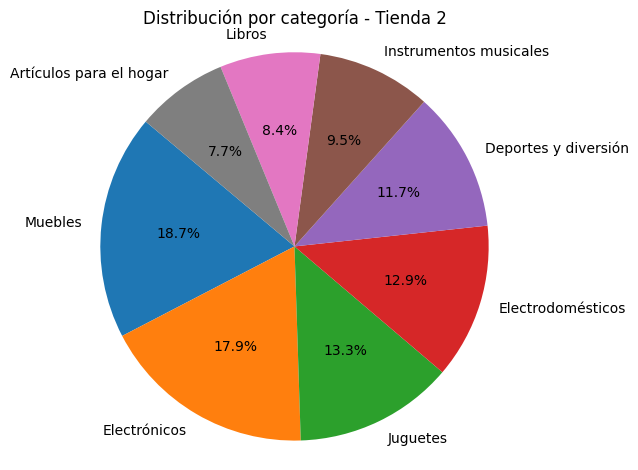

In [102]:
# Gráfico 2.2: Pie chart - categorías de productos en tienda 2
plt.pie(
    cantidad_tienda2.values(),
    labels=cantidad_tienda2.keys(),
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribución por categoría - Tienda 2")
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.tight_layout()
plt.show()


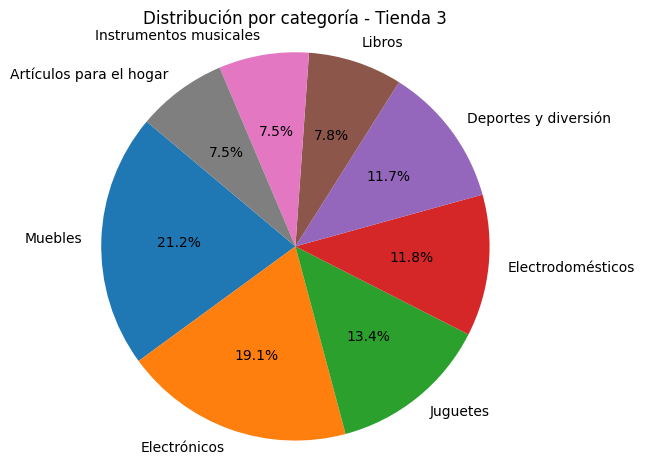

In [103]:
# Gráfico 2.3: Pie chart - categorías de productos en tienda 3
plt.pie(
    cantidad_tienda3.values(),
    labels=cantidad_tienda3.keys(),
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribución por categoría - Tienda 3")
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.tight_layout()
plt.show()


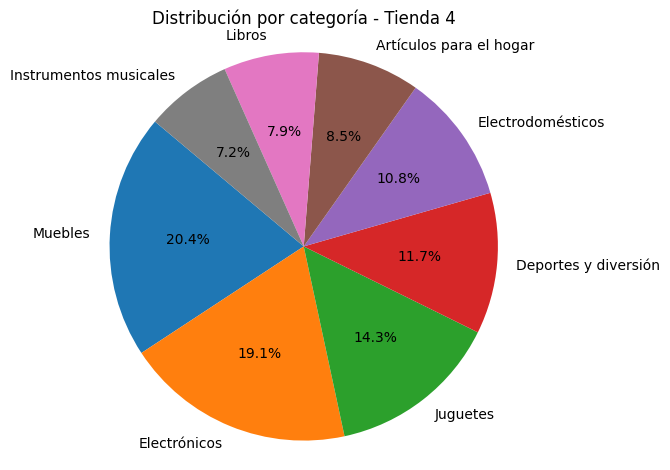

In [104]:
# Gráfico 2.4: Pie chart - categorías de productos en tienda 4
plt.pie(
    cantidad_tienda4.values(),
    labels=cantidad_tienda4.keys(),
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribución por categoría - Tienda 4")
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.tight_layout()
plt.show()


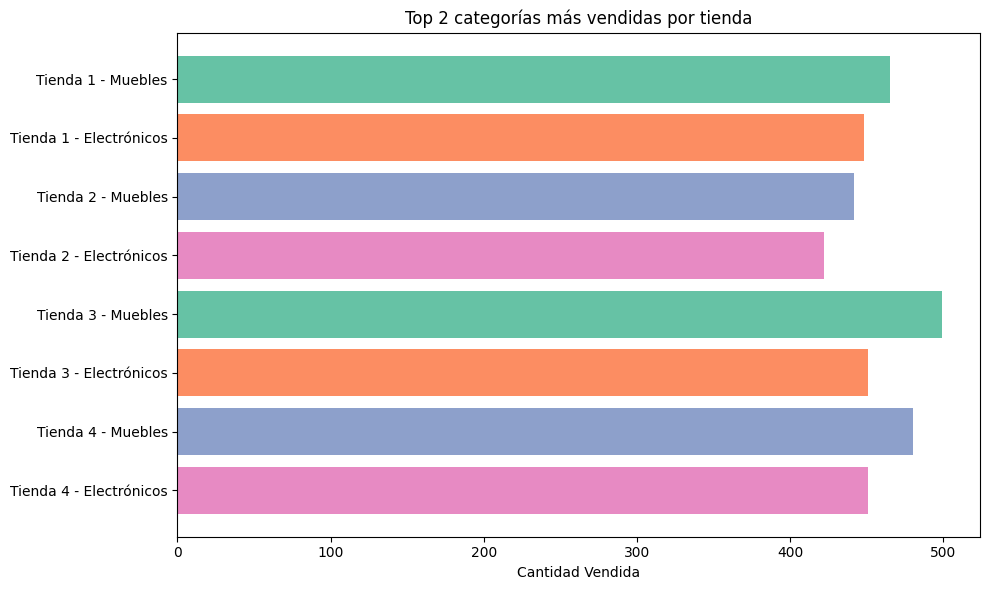

In [105]:
categorias = []
valores = []
tiendas = []

for i, (mas_vendidos, nombre_tienda) in enumerate(zip(
        [mas_vendidos_tienda1, mas_vendidos_tienda2, mas_vendidos_tienda3, mas_vendidos_tienda4],
        ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])):
    
    for categoria, cantidad in mas_vendidos:
        categorias.append(categoria)
        valores.append(cantidad)
        tiendas.append(nombre_tienda)

# Graficar
plt.figure(figsize=(10,6))
colores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'] * 2  

bars = plt.barh(range(len(categorias)), valores, color=colores)
plt.yticks(range(len(categorias)), [f"{t} - {c}" for t, c in zip(tiendas, categorias)])
plt.xlabel("Cantidad Vendida")
plt.title("Top 2 categorías más vendidas por tienda")
plt.gca().invert_yaxis()  #La categoría más vendida arriba
plt.tight_layout()
plt.show()

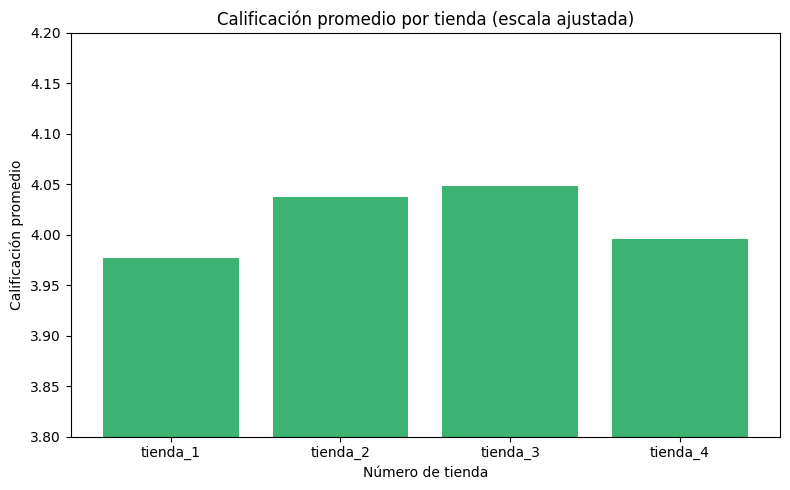

In [106]:
#  Gráfico 3: Calificación promedio (barras)
plt.figure(figsize=(8,5))
plt.bar(calificacion.keys(), calificacion.values(), color='mediumseagreen')
plt.title("Calificación promedio por tienda (escala ajustada)")
plt.ylim(3.8, 4.2)  # Zoom
plt.ylabel("Calificación promedio")
plt.xlabel("Número de tienda")
plt.tight_layout()
plt.show()


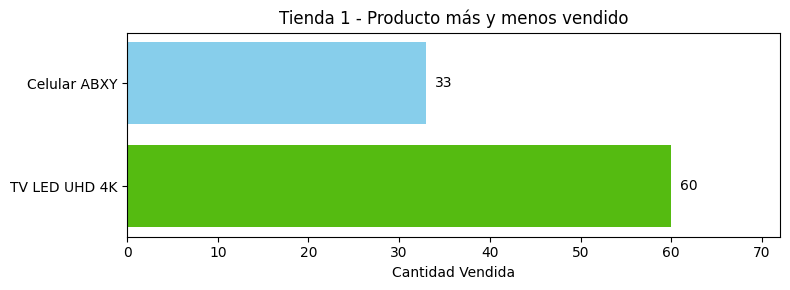

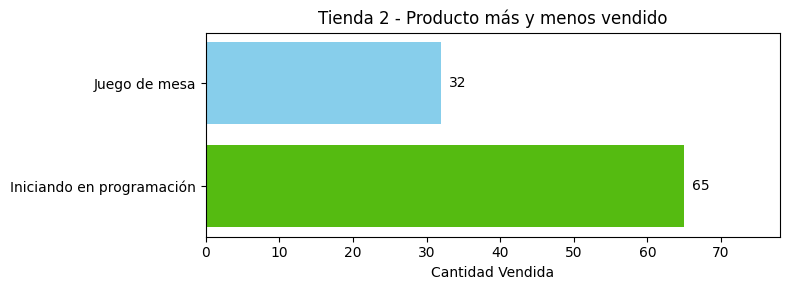

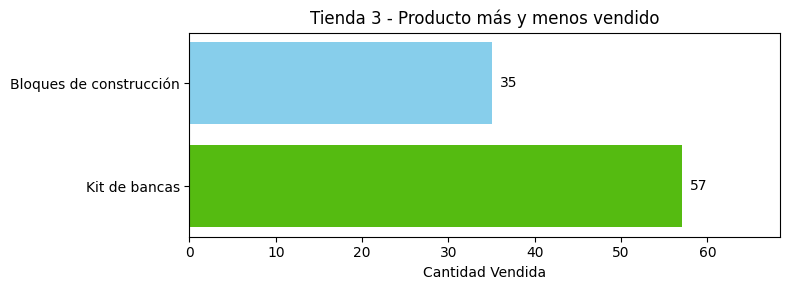

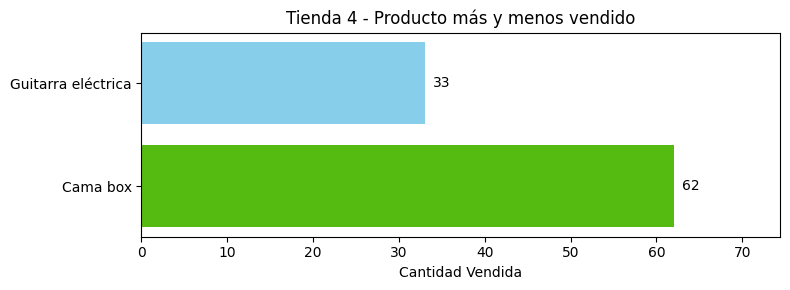

In [107]:
# Función para graficar más y menos vendidos de una tienda
def graficar_mas_menos_vendidos(diccionario, titulo):
    mas_vendido, menos_vendido = mas_y_menos_vendido(diccionario)
    
    productos = [mas_vendido[0], menos_vendido[0]]
    cantidades = [mas_vendido[1], menos_vendido[1]]

    plt.figure(figsize=(8, 3))
    barras = plt.barh(productos, cantidades, color=['#5B1', 'skyblue'])
    plt.title(titulo)
    plt.xlabel("Cantidad Vendida")

    # Etiquetas de cantidad
    for barra in barras:
        ancho = barra.get_width()
        plt.text(ancho + 1, barra.get_y() + barra.get_height()/2,
                 f'{int(ancho)}', va='center')

    plt.xlim(0, max(cantidades)*1.2)
    plt.tight_layout()
    plt.show()
    
graficar_mas_menos_vendidos(cantidad_productos_tienda1, "Tienda 1 - Producto más y menos vendido")
graficar_mas_menos_vendidos(cantidad_productos_tienda2, "Tienda 2 - Producto más y menos vendido")
graficar_mas_menos_vendidos(cantidad_productos_tienda3, "Tienda 3 - Producto más y menos vendido")
graficar_mas_menos_vendidos(cantidad_productos_tienda4, "Tienda 4 - Producto más y menos vendido")


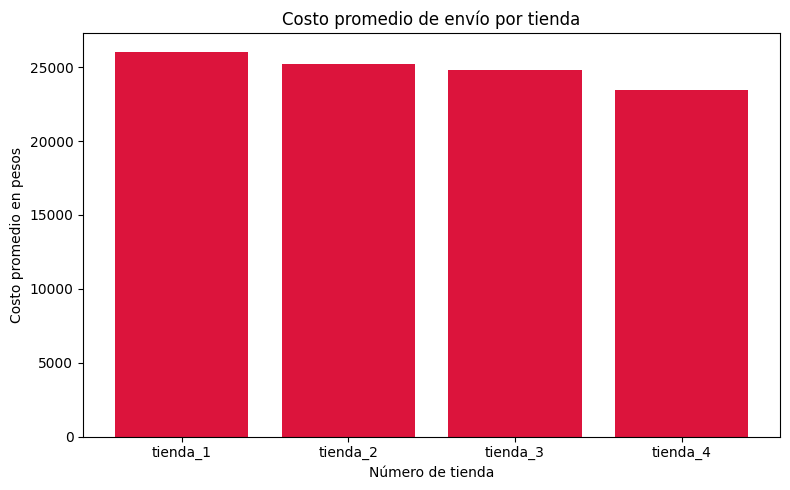

In [108]:
# Gráfico 5: Costo promedio de envío por tienda (barras)
plt.figure(figsize=(8, 5))
plt.bar(costo.keys(), costo.values(), color='crimson')
plt.title("Costo promedio de envío por tienda")
plt.xlabel("Número de tienda")
plt.ylabel("Costo promedio en pesos")
plt.tight_layout()
plt.show()


7. Análisis de Rendimiento:

* El mayor ingreso total lo posee la tienda 1, y el menor: la tienda 4
* En todas las tiendas la categoría más vendida es la de "Muebles",Con la mayor venta correspondiente a la tienda 3.  Y la segunda categoría es "Electrónicos", con la mayor venta correspondiente a la tienda 1 
* La mayor calificación promedio la posee la tienda 3, y la menor: la tienda 1.
* El producto más vendido con mayor cantidad de ventas, corresponde a la tienda 2 (Iniciando en programación) y, el que tiene menor cantidad de ventas en la tienda 3. El producto menos vendido  con mayor cantidad de ventas corresponde a la tienda  1 , y el que tiene menor cantidad de ventas corresponde a la tienda 2
* El mayor costo promedio lo posee la tienda 1, y el mínimo: la tienda 4

# Informe Final de Análisis para la decisión de Venta de Tienda  
## Cadena Alura Store

### Introducción  
El propósito de este análisis es ayudar al Sr. Juan a decidir cuál de las cuatro tiendas de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Se analizaron cinco aspectos fundamentales: ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de clientes, productos más y menos vendidos, y el costo promedio de envío.
La intención es identificar la tienda con peor desempeño para optimizar recursos y maximizar rentabilidad.

---

### Desarrollo del Análisis

**Ingresos Totales:**  
El análisis de facturación muestra que la tienda 1 genera el mayor ingreso total, seguida por las tiendas 2 y 3, mientras que la tienda 4 registra el ingreso más bajo. Esto indica que la tienda 4 tiene menor rendimiento económico en términos de ventas totales.

**Categorías de Productos Más Vendidas:**  
En todas las tiendas, la categoría dominante es "Muebles", siendo la tienda 3 la que más ventas registra en esta categoría. La segunda categoría más popular es "Electrónicos", con la tienda 1 destacándose en este sector. Esta distribución muestra que las tiendas tienen un enfoque similar en productos, pero con variaciones en volumen de ventas.

**Calificaciones Promedio de Clientes:**  
Las valoraciones reflejan una buena aceptación general. La tienda 3 ostenta la mayor calificación promedio (4.05), evidenciando mayor satisfacción, mientras que la tienda 1 tiene la calificación más baja (3.98), aunque las diferencias son mínimas.

**Productos Más y Menos Vendidos:**  
El producto más vendido en cantidad pertenece a la tienda 2 ("Iniciando en programación"), mientras que la tienda 3 tiene el producto menos vendido con menor cantidad. Por otro lado, la tienda 1 tiene el producto menos vendido con la mayor cantidad, y la tienda 2 cuenta con el producto menos vendido con menor cantidad. Esto indica diversidad en la demanda y en la eficiencia de inventarios entre tiendas.

**Costo Promedio de Envío:**  
El análisis del costo promedio de envío muestra que la tienda 1 tiene el mayor gasto logístico promedio, mientras que la tienda 4 presenta el menor. Esto es relevante para evaluar la rentabilidad neta de cada tienda.

---

### Conclusión y Recomendación

Considerando todos los factores analizados, la **Tienda 4** es la candidata más adecuada para ser vendida por el Sr. Juan. Esta decisión se basa en:

- Tener el ingreso total más bajo entre las cuatro tiendas.
- Aunque el costo promedio de envío es el menor, esto no compensa el bajo volumen de ventas.
- La calificación de clientes es intermedia, pero no sobresaliente.
- Las categorías y productos no logran generar el volumen de ventas necesario para competir con las otras tiendas.

Vender la tienda 4 permitirá al Sr. Juan liberar recursos y enfocarlos en las tiendas con mayor facturación y mejores márgenes, como la tienda 1 y la tienda 3, que presentan mejor desempeño tanto en ingresos como en satisfacción del cliente.



### 8 . EXTRA:

 Tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

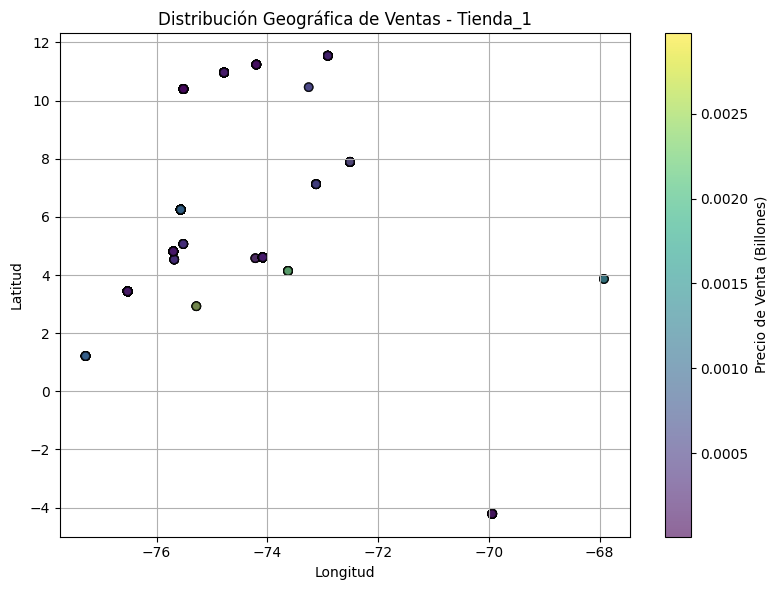

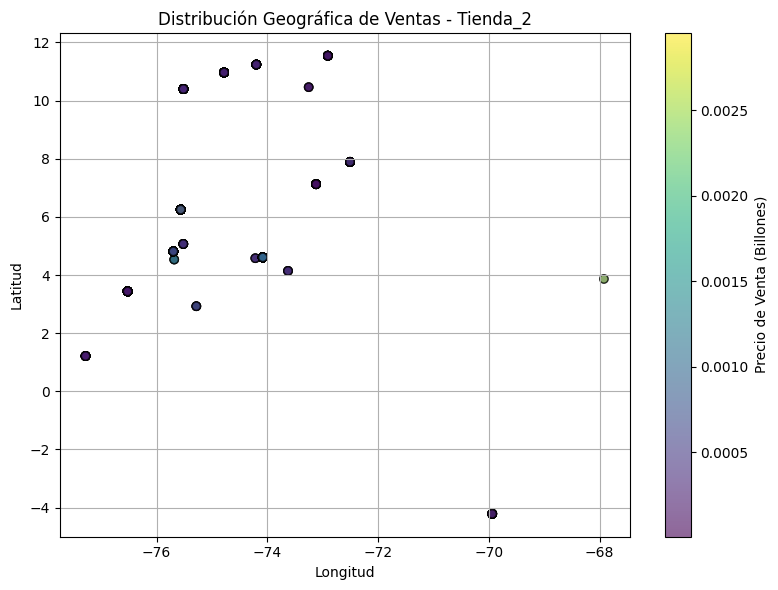

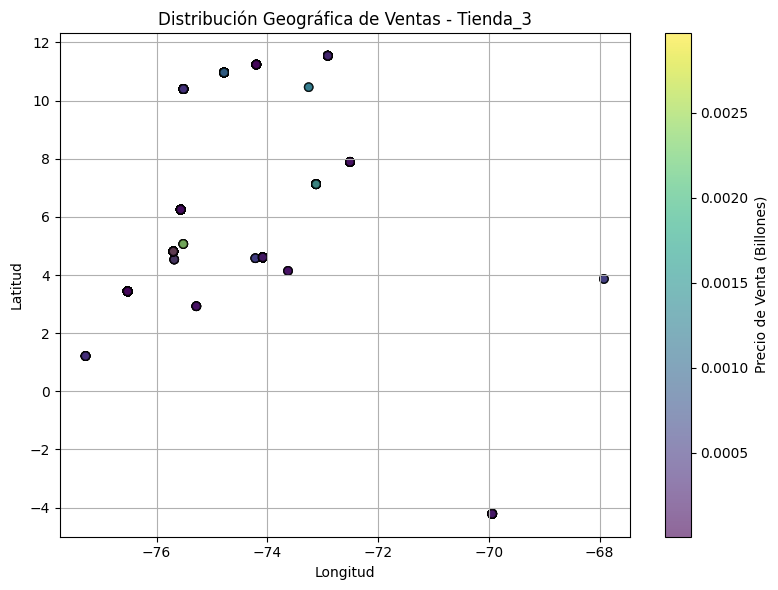

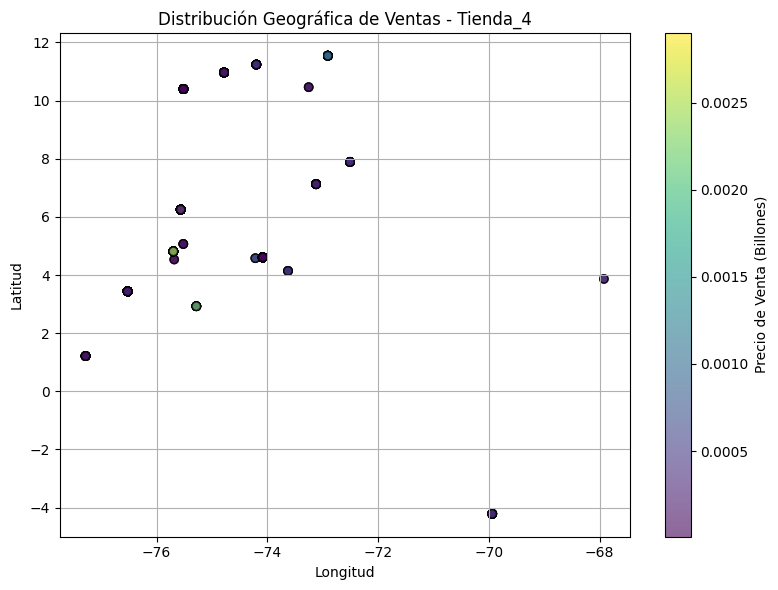

In [123]:
tiendas = {
    "tienda_1": tienda,
    "tienda_2": tienda2,
    "tienda_3": tienda3,
    "tienda_4": tienda4
}

for nombre, df in tiendas.items():
    plt.figure(figsize=(8,6))
    plt.scatter(
        df['lon'], df['lat'],
        c=df['Precio'] / 1e9,  # Precio en billones
        cmap='viridis',
        alpha=0.6,
        edgecolor='k'
    )
    cbar = plt.colorbar()
    cbar.set_label('Precio de Venta (Billones)')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title(f'Distribución Geográfica de Ventas - {nombre.capitalize()}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



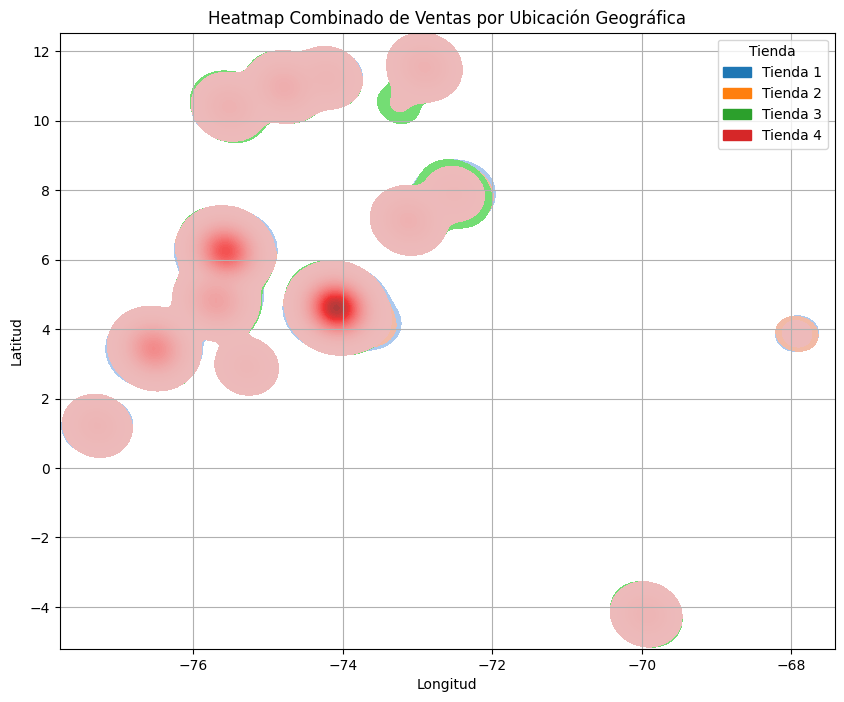

In [118]:
import seaborn as sns

# Unimos los datos de todas las tiendas en un solo DataFrame
df_todas = pd.concat([
    tienda.assign(Tienda="Tienda 1"),
    tienda2.assign(Tienda="Tienda 2"),
    tienda3.assign(Tienda="Tienda 3"),
    tienda4.assign(Tienda="Tienda 4")
])

# Creamos un heatmap KDE ponderado por el precio
plt.figure(figsize=(10,8))
sns.kdeplot(
    data=df_todas,
    x="lon", y="lat",
    weights=df_todas["Precio"],
    fill=True,
    hue="Tienda",
    bw_adjust=0.5,
    thresh=0.01,
    levels=50
)
plt.title("Heatmap Combinado de Ventas por Ubicación Geográfica")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()